In [1]:
__depends__ = [
    "../data/sr15_scenarios/sr15_scenarios.csv",
    "utils_openscm.py",
    "utils_config.py",
    "../data/magicc-cfgs/MAGTUNE_C4MIP_UVIC.CFG",
    "../data/magicc-cfgs/MAGTUNE_C4MIP_BERN.CFG",
    "../data/magicc-cfgs/MAGTUNE_C4MIP_LLNL.CFG",
    "../data/magicc-cfgs/MAGTUNE_C4MIP_CCSM1.CFG",
    "../data/magicc-cfgs/MAGTUNE_C4MIP_CLIMBER.CFG",
    "../data/magicc-cfgs/MAGTUNE_C4MIP_MPI.CFG",
    "../data/magicc-cfgs/MAGTUNE_C4MIP_FRCGC.CFG",
    "../data/magicc-cfgs/MAGTUNE_C4MIP_UMD2.CFG",
    "../data/magicc-cfgs/MAGTUNE_C4MIP_HADLEY.CFG",
    "utils_magcfg.py",
    "../data/magicc-cfgs/MAGTUNE_FULLTUNE_CCCMA_CGCM3_1_T47.CFG",
    "../data/magicc-cfgs/MAGTUNE_FULLTUNE_CNRM_CM3.CFG",
    "../data/magicc-cfgs/MAGTUNE_FULLTUNE_CSIRO_MK3_0.CFG",
    "../data/magicc-cfgs/MAGTUNE_FULLTUNE_GFDL_CM2_0.CFG",
    "../data/magicc-cfgs/MAGTUNE_FULLTUNE_GFDL_CM2_1.CFG",
    "../data/magicc-cfgs/MAGTUNE_FULLTUNE_GISS_MODEL_E_H.CFG",
    "../data/magicc-cfgs/MAGTUNE_FULLTUNE_GISS_MODEL_E_R.CFG",
    "../data/magicc-cfgs/MAGTUNE_FULLTUNE_IAP_FGOALS1_0_G.CFG",
    "../data/magicc-cfgs/MAGTUNE_FULLTUNE_INMCM3_0.CFG",
    "../data/magicc-cfgs/MAGTUNE_FULLTUNE_IPSL_CM4.CFG",
    "../data/magicc-cfgs/MAGTUNE_FULLTUNE_MIROC3_2_HIRES.CFG",
    "../data/magicc-cfgs/MAGTUNE_FULLTUNE_MIROC3_2_MEDRES.CFG",
    "../data/magicc-cfgs/MAGTUNE_FULLTUNE_MIUB_ECHO_G.CFG",
    "../data/magicc-cfgs/MAGTUNE_FULLTUNE_MPI_ECHAM5.CFG",
    "../data/magicc-cfgs/MAGTUNE_FULLTUNE_MRI_CGCM2_3_2A.CFG",
    "../data/magicc-cfgs/MAGTUNE_FULLTUNE_NCAR_CCSM3_0.CFG",
    "../data/magicc-cfgs/MAGTUNE_FULLTUNE_NCAR_PCM1.CFG",
    "../data/magicc-cfgs/MAGTUNE_FULLTUNE_UKMO_HADCM3.CFG",
    "../data/magicc-cfgs/MAGTUNE_FULLTUNE_UKMO_HADGEM1.CFG",
]
__dest__ = [
    "../outputs/online_budget_runs.h5",
    "../outputs/online_budget_runs_permafrost.h5",
]

In [2]:
%load_ext nb_black

<IPython.core.display.Javascript object>

Cell above is scons stuff to make sure our dependency tree work. We put a renaming in the cell below to make it clearer what is what.

In [3]:
SCENARIO_PATH = __depends__[0]
CARBON_CYCLE_FILES = {
    "UVIC": __depends__[3],
    "BERN": __depends__[4],
    "LLNL": __depends__[5],
    "CCSM1": __depends__[6],
    "CLIMBER": __depends__[7],
    "MPI": __depends__[8],
    "FRCGC": __depends__[9],
    "UMD2": __depends__[10],
    "HADLEY": __depends__[11],
}
OCEAN_TUNING_FILES = {
    "CCCMA_CGCM3_1_T47": __depends__[13],
    "CNRM_CM3": __depends__[14],
    "CSIRO_MK3_0": __depends__[15],
    "GFDL_CM2_0": __depends__[16],
    "GFDL_CM2_1": __depends__[17],
    "GISS_MODEL_E_H": __depends__[18],
    "GISS_MODEL_E_R": __depends__[19],
    "IAP_FGOALS1_0_G": __depends__[20],
    "INMCM3_0": __depends__[21],
    "IPSL_CM4": __depends__[22],
    "MIROC3_2_HIRES": __depends__[23],
    "MIROC3_2_MEDRES": __depends__[24],
    "MIUB_ECHO_G": __depends__[25],
    "MPI_ECHAM5": __depends__[26],
    "MRI_CGCM2_3_2A": __depends__[27],
    "NCAR_CCSM3_0": __depends__[28],
    "NCAR_PCM1": __depends__[29],
    "UKMO_HADCM3": __depends__[30],
    "UKMO_HADGEM1": __depends__[31],
}
OUTPUT_RUNS = __dest__[0]
OUTPUT_RUNS_PERMAFROST = __dest__[1]

<IPython.core.display.Javascript object>

# Online Budget Runs

In this notebook we perform the runs for the calculation of our online budget.

## Imports

In [4]:
import os
from distutils.util import strtobool

from openscm.scmdataframe import ScmDataFrame

from utils_openscm import save_scmdataframe, run_magicc6_with_scenarios
from utils_config import TEST_RUN
from utils_magcfg import get_carbon_cycle_cfgs, get_ocean_tuning_cfgs

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Plotting Config

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

from utils_plotting import setup

setup()

<IPython.core.display.Javascript object>

## Constants

In [6]:
SHOW_PLOTS = True and not strtobool(
    os.getenv("CI", "False")
)  # turn on if using the notebooks interactively

CARBON_CYCLES = get_carbon_cycle_cfgs(CARBON_CYCLE_FILES)
OCEAN_TUNINGS = get_ocean_tuning_cfgs(OCEAN_TUNING_FILES)

<IPython.core.display.Javascript object>

## Read in scenarios

In [7]:
scenarios = ScmDataFrame(SCENARIO_PATH)

<IPython.core.display.Javascript object>

INFO:root:>=13 labels, not applying legend


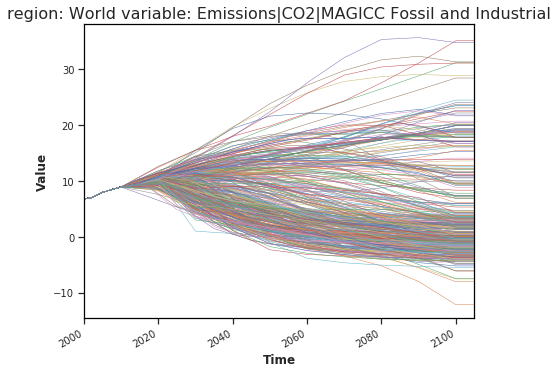

<IPython.core.display.Javascript object>

In [8]:
if SHOW_PLOTS:
    ax = scenarios.filter(
        variable="Emissions|CO2|MAGICC Fossil and Industrial", region="World"
    ).line_plot(linewidth=0.5)

INFO:root:>=13 labels, not applying legend


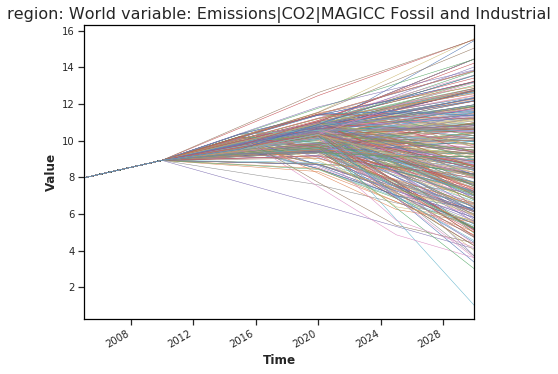

<IPython.core.display.Javascript object>

In [9]:
if SHOW_PLOTS:
    ax = scenarios.filter(
        variable="Emissions|CO2|MAGICC Fossil and Industrial",
        region="World",
        year=range(2005, 2031),
    ).line_plot(linewidth=0.5)

## Run MAGICC

Here we run MAGICC with the permafrost module on.

In [10]:
RUN_SETTINGS = {
    "endyear": 2110,  # avoid strange MAGICC end year behaviour
    "rf_total_runmodus": "all",
    "pf_apply": 1,
    "out_permafrost": 1,
    "out_forcing": 1,
    "co2_switchfromconc2emis_year": 1750,
    "co2_tempfeedback_yrstart": 1750,
    "co2_fertilization_yrstart": 1750,
}

vars_to_keep = [
    "Surface Temperature",
    "Emissions|CO2|MAGICC Fossil and Industrial",
    "Emissions|CO2|MAGICC AFOLU",
    "Inverse Emissions|CO2|MAGICC Fossil and Industrial",
    "Atmospheric Concentrations|CO2",
    "Radiative Forcing",
    "Radiative Forcing|CO2",
    "Radiative Forcing|Greenhouse Gases",
    "Radiative Forcing|Aerosols|Direct Effect",
    "Radiative Forcing|Aerosols|Indirect Effect",
    "Land to Air Flux|CO2|MAGICC Permafrost",
]

<IPython.core.display.Javascript object>

In [11]:
for j, (cc, cc_config) in enumerate(CARBON_CYCLES.items()):
    if TEST_RUN and j > 2 and cc != "default":
        continue
    print(cc)
    settings = {**RUN_SETTINGS, **cc_config}
    res = run_magicc6_with_scenarios(scenarios, settings, vars_to_keep=vars_to_keep, test_run=TEST_RUN)
    res.set_meta(cc, name="carbon_cycle_tuning")
    out_run_file = (
        OUTPUT_RUNS
        if cc == "default"
        else OUTPUT_RUNS.replace(".h5", "_{}.h5".format(cc))
    )
    out_permafrost_file = (
        OUTPUT_RUNS_PERMAFROST
        if cc == "default"
        else OUTPUT_RUNS_PERMAFROST.replace(".h5", "_{}.h5".format(cc))
    )
    save_scmdataframe(res.filter(year=range(1, 2101), region="World"), out_run_file)
    save_scmdataframe(
        res.filter(
            year=range(1, 2110),
            region="World",
            variable=["*Permafrost*", "Em*CO2*", "*Temp*"],
        ),
        out_permafrost_file,
    )

/ |#                                                  | 0 Elapsed Time: 0:00:00

UVIC


| |                                   #             | 410 Elapsed Time: 0:12:38
numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
/ |#                                                  | 0 Elapsed Time: 0:00:00

BERN


| |                                         #       | 410 Elapsed Time: 0:12:40
/ |#                                                  | 0 Elapsed Time: 0:00:00

LLNL


| |                                              #  | 410 Elapsed Time: 0:12:39
/ |#                                                  | 0 Elapsed Time: 0:00:00

CCSM1


| |               #                                 | 410 Elapsed Time: 0:12:42
/ |#                                                  | 0 Elapsed Time: 0:00:00

CLIMBER


| |                                  #              | 410 Elapsed Time: 0:12:28
/ |#                                                  | 0 Elapsed Time: 0:00:00

MPI


| |                                              #  | 410 Elapsed Time: 0:12:39
/ |#                                                  | 0 Elapsed Time: 0:00:00

FRCGC


| |                                 #               | 410 Elapsed Time: 0:12:21
/ |#                                                  | 0 Elapsed Time: 0:00:00

UMD2


| |             #                                   | 410 Elapsed Time: 0:12:26
/ |#                                                  | 0 Elapsed Time: 0:00:00

HADLEY


| |                                   #             | 410 Elapsed Time: 0:12:28
/ |#                                                  | 0 Elapsed Time: 0:00:00

default


| |       #                                         | 410 Elapsed Time: 0:12:35


<IPython.core.display.Javascript object>

In [12]:
for j, (oc, oc_config) in enumerate(OCEAN_TUNINGS.items()):
    if TEST_RUN and j > 2 and oc != "default":
        continue
    print(oc)
    settings = {**RUN_SETTINGS, **oc_config}
    res = run_magicc6_with_scenarios(scenarios, settings, vars_to_keep=vars_to_keep, test_run=TEST_RUN)
    res.set_meta(oc, name="ocean_tuning")
    out_run_file = (
        OUTPUT_RUNS
        if oc == "default"
        else OUTPUT_RUNS.replace(".h5", "_{}_ocean.h5".format(oc))
    )
    out_permafrost_file = (
        OUTPUT_RUNS_PERMAFROST
        if oc == "default"
        else OUTPUT_RUNS_PERMAFROST.replace(".h5", "_{}_ocean.h5".format(oc))
    )
    save_scmdataframe(res.filter(year=range(1, 2101), region="World"), out_run_file)
    save_scmdataframe(
        res.filter(
            year=range(1, 2110),
            region="World",
            variable=["*Permafrost*", "Em*CO2*", "*Temp*"],
        ),
        out_permafrost_file,
    )

/ |#                                                  | 0 Elapsed Time: 0:00:00

CCCMA_CGCM3_1_T47


| |                     #                           | 410 Elapsed Time: 0:12:32
/ |#                                                  | 0 Elapsed Time: 0:00:00

CNRM_CM3


| |                          #                      | 410 Elapsed Time: 0:12:41
/ |#                                                  | 0 Elapsed Time: 0:00:00

CSIRO_MK3_0


| |                        #                        | 410 Elapsed Time: 0:12:37
/ |#                                                  | 0 Elapsed Time: 0:00:00

GFDL_CM2_0


| |                           #                     | 410 Elapsed Time: 0:12:31
/ |#                                                  | 0 Elapsed Time: 0:00:00

GFDL_CM2_1


| |                                            #    | 410 Elapsed Time: 0:12:39
/ |#                                                  | 0 Elapsed Time: 0:00:00

GISS_MODEL_E_H


| |                           #                     | 410 Elapsed Time: 0:12:47
/ |#                                                  | 0 Elapsed Time: 0:00:00

GISS_MODEL_E_R


| |                                #                | 410 Elapsed Time: 0:12:37
/ |#                                                  | 0 Elapsed Time: 0:00:00

IAP_FGOALS1_0_G


| |                                       #         | 410 Elapsed Time: 0:12:30
/ |#                                                  | 0 Elapsed Time: 0:00:00

INMCM3_0


| |                                              #  | 410 Elapsed Time: 0:12:39
/ |#                                                  | 0 Elapsed Time: 0:00:00

IPSL_CM4


| |         #                                       | 410 Elapsed Time: 0:12:35
/ |#                                                  | 0 Elapsed Time: 0:00:00

MIROC3_2_HIRES


| |                                               # | 410 Elapsed Time: 0:12:39
/ |#                                                  | 0 Elapsed Time: 0:00:00

MIROC3_2_MEDRES


| |                      #                          | 410 Elapsed Time: 0:12:51
/ |#                                                  | 0 Elapsed Time: 0:00:00

MIUB_ECHO_G


| |                #                                | 410 Elapsed Time: 0:12:36
/ |#                                                  | 0 Elapsed Time: 0:00:00

MPI_ECHAM5


| |                  #                              | 410 Elapsed Time: 0:12:36
/ |#                                                  | 0 Elapsed Time: 0:00:00

MRI_CGCM2_3_2A


| |                                         #       | 410 Elapsed Time: 0:12:40
/ |#                                                  | 0 Elapsed Time: 0:00:00

NCAR_CCSM3_0


| |                 #                               | 410 Elapsed Time: 0:12:32
/ |#                                                  | 0 Elapsed Time: 0:00:00

NCAR_PCM1


| |                                       #         | 410 Elapsed Time: 0:12:40
/ |#                                                  | 0 Elapsed Time: 0:00:00

UKMO_HADCM3


| |                    #                            | 410 Elapsed Time: 0:13:06
/ |#                                                  | 0 Elapsed Time: 0:00:00

UKMO_HADGEM1


| |                           #                     | 410 Elapsed Time: 0:12:41


<IPython.core.display.Javascript object>

In [13]:
res["variable"].unique()

array(['Atmospheric Concentrations|CO2', 'Emissions|CO2|MAGICC AFOLU',
       'Emissions|CO2|MAGICC Fossil and Industrial',
       'Land to Air Flux|CO2|MAGICC Permafrost', 'Radiative Forcing',
       'Radiative Forcing|Aerosols|Direct Effect',
       'Radiative Forcing|Aerosols|Indirect Effect',
       'Radiative Forcing|CO2', 'Radiative Forcing|Greenhouse Gases',
       'Surface Temperature'], dtype=object)

<IPython.core.display.Javascript object>

In [14]:
res.head()

time                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          1765-01-01  \
model   scenario               region                          variable                       unit climate_model todo endyear rf_total_runmodus pf_apply out_permafrost out_forcing co2_switchfromconc2emis_year co2_tempfeedback_yrstart co2_fertilization_yrstart core_amplify_ocn2land_heatxchng core_climatesensitivity core_delq2xco2 core_feedback_qsensitivity core_heatxchange_landocean core_heatxchange_northsouth core_hemisfraction_nh_land core_hemisfraction_sh_land core_rlo core_verticaldiffusivity core_verticaldiff_top_dkdt ocean_tuning               
AIM_2_0 ADVANCE_2020_1.5C-2100 World                           Atmospheric Concentrations|CO2 ppm  MAGICC6       N/A  2110    all               1        1              1           1750                         1750                     1750                      1.000007                        2.998252                3.78           0.075                      0.200003                   0.200002                    0.456844                   0.228672                   1.323931 0.774467                 -7.009528e-08              UKMO_HADGEM1   278.05158   
                               World|Northern Hemisphere|Land  Atmospheric Concentrations|CO2 ppm  MAGICC6       N/A  2110    all               1        1              1           1750                         1750                     1750                      1.000007                        2.998252                3.78           0.075                      0.200003                   0.200002                    0.456844                   0.228672                   1.323931 0.774467                 -7.009528e-08              UKMO_HADGEM1   278.05158   
                               World|Northern Hemisphere|Ocean Atmospheric Concentrations|CO2 ppm  MAGICC6       N/A  2110    all               1        1              1           1750                         1750                     1750                      1.000007                        2.998252                3.78           0.075                      0.200003                   0.200002                    0.456844                   0.228672                   1.323931 0.774467                 -7.009528e-08              UKMO_HADGEM1   278.05158   
                               World|Southern Hemisphere|Land  Atmospheric Concentrations|CO2 ppm  MAGICC6       N/A  2110    all               1        1              1           1750                         1750                     1750                      1.000007                        2.998252                3.78           0.075                      0.200003                   0.200002                    0.456844                   0.228672                   1.323931 0.774467                 -7.009528e-08              UKMO_HADGEM1   278.05158   
                               World|Southern Hemisphere|Ocean Atmospheric Concentrations|CO2 ppm  MAGICC6       N/A  2110    all               1        1              1           1750                         1750                     1750                      1.000007                        2.998252                3.78           0.075                      0.200003                   0.200002                    0.456844                   0.228672                   1.323931 0.774467                 -7.009528e-08              UKMO_HADGEM1   278.05158   

time                                                                                                       

<IPython.core.display.Javascript object>

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
INFO:root:>=13 labels, not applying legend
INFO:root:>=13 labels, not applying legend
INFO:root:>=13 labels, not applying legend


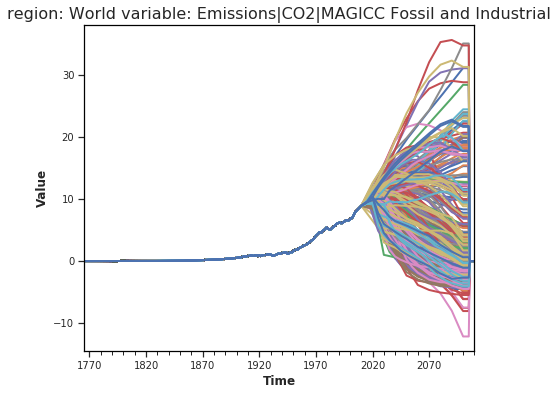

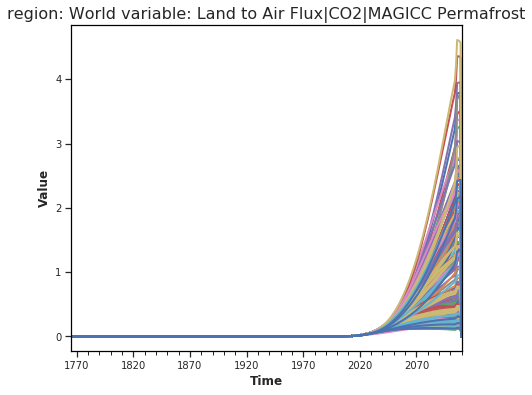

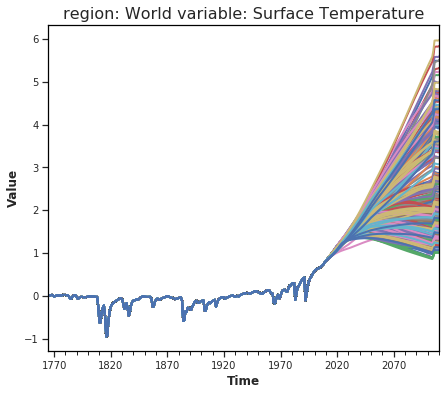

<IPython.core.display.Javascript object>

In [15]:
if SHOW_PLOTS:
    res.filter(variable="Emis*CO2*Fossil*", region="World").line_plot(
        x="time", color="model"
    )
    res.filter(variable="*Permafrost*", region="World").line_plot(
        x="time", color="model"
    )
    res.filter(variable="*Temperature*", region="World").line_plot(
        x="time", color="model"
    )